In [104]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.metrics import classification_report

In [105]:
model = load_model('best_c10_weights.hdf5')

In [106]:
image_original = cv2.imread('sample.png')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

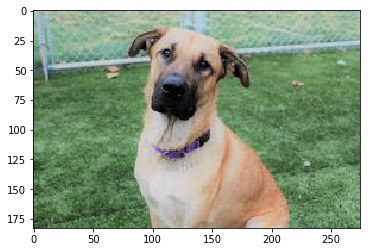

In [107]:
plt.imshow(image_original)

In [108]:
def preprocess(image):
    ''' Preprocess an image (resizeing, extracting patches/crops...) '''
    if image is not None:
        # Resize the image
        image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
        # Extract a random crop from the image
        try:
            image = extract_patches_2d(image, (32, 32), max_patches=1)[0]
        except Exception:
            pass
        # Transform image to array
        image = img_to_array(image, data_format=None)
        # Send back the image
        return image

In [109]:
image = preprocess(image_original)

In [110]:
image = image.astype('float') / 255.0 # Normalize [0, 1]
image = np.expand_dims(image, axis=0) # Add one extra dimension

In [111]:
print(image)

[[[[0.62745098 0.71764706 0.71764706]
   [0.62745098 0.74509804 0.69019608]
   [0.64313725 0.7254902  0.60784314]
   ...
   [0.67058824 0.74509804 0.63529412]
   [0.58823529 0.72156863 0.61176471]
   [0.61960784 0.71764706 0.64313725]]

  [[0.62352941 0.71372549 0.72156863]
   [0.60392157 0.70588235 0.68235294]
   [0.63921569 0.70588235 0.60392157]
   ...
   [0.6627451  0.7372549  0.65882353]
   [0.61176471 0.73333333 0.63529412]
   [0.62745098 0.72941176 0.62745098]]

  [[0.61176471 0.71372549 0.68627451]
   [0.58039216 0.70196078 0.66666667]
   [0.58039216 0.71764706 0.61176471]
   ...
   [0.6627451  0.74901961 0.65882353]
   [0.61176471 0.71764706 0.62352941]
   [0.63529412 0.7254902  0.63529412]]

  ...

  [[0.29019608 0.42352941 0.25490196]
   [0.30196078 0.41960784 0.25882353]
   [0.34117647 0.49803922 0.3254902 ]
   ...
   [0.39607843 0.55686275 0.38039216]
   [0.44705882 0.60784314 0.43921569]
   [0.44705882 0.60784314 0.45490196]]

  [[0.23137255 0.34509804 0.21568627]
   [0.2

In [112]:
# Set labels names for easier reading
label_names = ['Airplane', 'Automobile', 'Bird',
              'Cat', 'Deer', 'Dog', 'Frog',
              'Horse', 'Ship', 'Truck']

preds = model.predict([image])
predicted = preds.argmax(axis=1)
print('Predicted:', preds, predicted)

Predicted: [[1.6346190e-05 1.7261781e-06 2.0492706e-03 5.2826166e-02 4.0316316e-03
  9.3123978e-01 4.5918321e-04 8.6331591e-03 4.6336954e-04 2.7932675e-04]] [5]


In [113]:
cv2.putText(image_original, f'Label: {label_names[predicted[0]]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

array([[[145, 170, 148],
        [159, 183, 169],
        [174, 195, 198],
        ...,
        [149, 171, 159],
        [156, 176, 165],
        [162, 182, 171]],

       [[139, 164, 142],
        [155, 179, 165],
        [172, 193, 196],
        ...,
        [158, 176, 164],
        [167, 180, 170],
        [173, 186, 177]],

       [[137, 162, 140],
        [152, 176, 162],
        [169, 190, 195],
        ...,
        [170, 180, 169],
        [181, 182, 174],
        [186, 187, 181]],

       ...,

       [[ 48,  72,  48],
        [ 51,  75,  51],
        [ 65,  89,  63],
        ...,
        [ 98, 139,  95],
        [104, 145, 101],
        [109, 150, 106]],

       [[ 78, 100,  77],
        [ 62,  86,  62],
        [ 69,  93,  69],
        ...,
        [ 88, 129,  85],
        [ 98, 139,  95],
        [111, 152, 108]],

       [[ 34,  53,  33],
        [ 18,  40,  17],
        [ 39,  61,  38],
        ...,
        [ 82, 123,  79],
        [ 94, 135,  93],
        [108, 149, 107]]

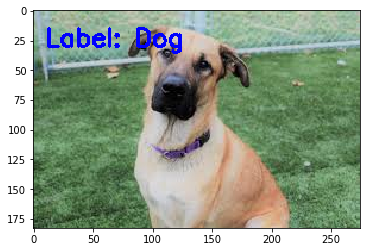

In [114]:
plt.imshow(image_original)